# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год

## Групповой проект №2. DE: Scraping & API

## Общая информация

__Дата выдачи:__ 21.02.2025

__Защита проекта:__ 05.03.2025

# Код --- Запрос: Браслет женский

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from datetime import datetime, timedelta

## Считываем данные и начальная обработка

###Скачивание

In [ ]:
ozon = pd.read_csv("ozon_data_z1.csv")
ozon.head()

,product_url,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
0,/product/miestilo-braslet-serebro-925-zhenskiy...,MIESTILO браслет серебро 925 женский позолочен...,MIESTILO,True,2123.0,3600.0,−41%,5.0,10.0,Завтра,OZON
1,/product/braslet-na-ruku-zhenskiy-s-serdechkom...,Браслет на руку женский с сердечком бижутерия,Стало дешевле,False,642.0,3000.0,−78%,4.9,90.0,Завтра,OZON
2,/product/braslet-zhenskiy-na-ruku-iz-naturalny...,"Браслет женский на руку, из натуральных камней...",NaN,False,792.0,3550.0,−77%,4.9,144.0,6 марта,OZON
3,/product/f-jewelry-braslet-serebro-925-zhenski...,F-Jewelry Браслет серебро 925 женский крупный ...,NaN,False,3704.0,10498.0,−64%,4.9,35.0,Завтра,OZON
4,/product/zorka-braslet-zoloto-krasnoe-375-prob...,"ZORKA Браслет Золото красное 375 пробы, плетен...",NaN,False,3036.0,4860.0,−37%,5.0,34.0,Завтра,OZON


In [ ]:
simaland = pd.read_csv('simaland_data_z1.csv')
simaland.head()

,product_url,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
0,/product/pletenyy-braslet-ruchnoy-raboty-chakr...,"Плетеный браслет ручной работы, чакровый Вишудха",NaN,False,441.0,1500.0,−70%,4.5,4.0,6 марта,SL
1,/product/kozhanyy-braslet-s-gravirovkoy-krest-...,Кожаный браслет с гравировкой Крест Мары,NaN,False,1106.0,1988.0,−44%,4.7,38.0,Послезавтра,SL
2,/product/agat-temno-zelenyy-10mm-braslet-klass...,"Агат темно-зеленый 10мм, браслет ""Классика""",NaN,False,339.0,2190.0,−84%,4.8,82.0,7 марта,SL
3,/product/van-de-cam-braslet-so-vstavkami-16472...,VAN DE CAM Браслет со вставками,NaN,False,356.0,553.0,−35%,5.0,2.0,2 апреля,SL
4,/product/braslet-na-ruku-s-magnitnoy-zastezhko...,"Браслет на руку с магнитной застёжкой ""ЧЕРЕП""....",NaN,False,1034.0,2050.0,−49%,5.0,34.0,Завтра,SL


In [ ]:
wb = pd.read_csv('wb_data_z1.csv')
wb.head()

,product_url,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
0,/product/braslet-zhenskiy-na-nogu-anklet-sverk...,"Браслет женский на ногу - анклет, сверкающее у...",NaN,False,312.0,1700.0,−81%,4.9,557.0,Завтра,WB
1,/product/braslet-zolotoy-zhenskiy-585-proba-pl...,"Браслет золотой женский, 585 проба, плетение Н...",NaN,False,8144.0,20000.0,−59%,4.9,12.0,Завтра,WB
2,/product/braslet-zolotoy-zhenskiy-585-proba-pl...,"Браслет золотой женский, 585 проба, плетение Н...",NaN,False,13962.0,30000.0,−53%,4.9,61.0,Завтра,WB
3,/product/braslet-zolotoy-zhenskiy-585-proby-br...,"Браслет золотой женский 585 пробы, браслет-цеп...",KARATOV,True,12704.0,17143.0,−25%,4.8,154.0,Завтра,WB
4,/product/zolotoy-merkuriy-braslet-zhenskiy-na-...,Золотой Меркурий Браслет женский на руку с под...,NaN,False,727.0,3150.0,−76%,4.7,74.0,Завтра,WB


In [ ]:
yandex = pd.read_csv('yandex_market_data_z1.csv')
yandex.head()

,product_url,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
0,/product/zhenskiy-braslet-vetiver-iz-naturalny...,Женский браслет Vetiver из натуральных камней ...,NaN,False,368.0,1200.0,−69%,4.9,957.0,Завтра,YDX
1,/product/nabor-brasletov-snow-3-sht-1242800961...,"Набор браслетов ""Snow"", 3 шт.",NaN,False,153.0,1879.0,−91%,5.0,5.0,Завтра,YDX
2,/product/braslet-krasnaya-nit-na-ruku-92475608...,Браслет Красная нить на руку,NaN,False,303.0,690.0,−56%,4.7,151.0,Завтра,YDX
3,/product/alvi-lovely-braslet-dlya-sharmov-1800...,alvi lovely Браслет для шармов,NaN,False,354.0,2000.0,−82%,4.7,26.0,8 марта,YDX
4,/product/braslet-1565134664/?at=NOtwp2gZocmNrB...,Браслет,Стало дешевле,False,83.0,87.0,−4%,4.5,364.0,20 марта,YDX


In [ ]:
data_z1 = pd.concat([ozon, simaland, wb, yandex], axis=0, ignore_index=True)
data_z1.head()

,product_url,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
0,/product/miestilo-braslet-serebro-925-zhenskiy...,MIESTILO браслет серебро 925 женский позолочен...,MIESTILO,True,2123.0,3600.0,−41%,5.0,10.0,Завтра,OZON
1,/product/braslet-na-ruku-zhenskiy-s-serdechkom...,Браслет на руку женский с сердечком бижутерия,Стало дешевле,False,642.0,3000.0,−78%,4.9,90.0,Завтра,OZON
2,/product/braslet-zhenskiy-na-ruku-iz-naturalny...,"Браслет женский на руку, из натуральных камней...",NaN,False,792.0,3550.0,−77%,4.9,144.0,6 марта,OZON
3,/product/f-jewelry-braslet-serebro-925-zhenski...,F-Jewelry Браслет серебро 925 женский крупный ...,NaN,False,3704.0,10498.0,−64%,4.9,35.0,Завтра,OZON
4,/product/zorka-braslet-zoloto-krasnoe-375-prob...,"ZORKA Браслет Золото красное 375 пробы, плетен...",NaN,False,3036.0,4860.0,−37%,5.0,34.0,Завтра,OZON


**Удалим колонку product_url**

In [ ]:
del data_z1['product_url']

In [ ]:
data_z1.head()

,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
0,MIESTILO браслет серебро 925 женский позолочен...,MIESTILO,True,2123.0,3600.0,−41%,5.0,10.0,Завтра,OZON
1,Браслет на руку женский с сердечком бижутерия,Стало дешевле,False,642.0,3000.0,−78%,4.9,90.0,Завтра,OZON
2,"Браслет женский на руку, из натуральных камней...",NaN,False,792.0,3550.0,−77%,4.9,144.0,6 марта,OZON
3,F-Jewelry Браслет серебро 925 женский крупный ...,NaN,False,3704.0,10498.0,−64%,4.9,35.0,Завтра,OZON
4,"ZORKA Браслет Золото красное 375 пробы, плетен...",NaN,False,3036.0,4860.0,−37%,5.0,34.0,Завтра,OZON


In [ ]:
data_z1.shape

(10327, 10)

In [ ]:
data_z1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10327 entries, 0 to 10326
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   10327 non-null  object 
 1   brand          1308 non-null   object 
 2   is_original    10327 non-null  bool   
 3   final_price    10323 non-null  float64
 4   old_price      10315 non-null  float64
 5   discount       10315 non-null  object 
 6   rating         10158 non-null  float64
 7   reviews_count  10158 non-null  float64
 8   delivery_time  10327 non-null  object 
 9   market         10327 non-null  object 
dtypes: bool(1), float64(4), object(5)
memory usage: 736.3+ KB


**Удаление дубликатов**

In [ ]:
data_z1 = data_z1.drop_duplicates()

In [ ]:
data_z1.duplicated().sum()

0

In [ ]:
data_z1_start = data_z1.copy()

### Работа с ценовой категорией

**Рассмотрим востребованность на маркетплейсах нашей ценовой категории (700 - 2000 рублей)**

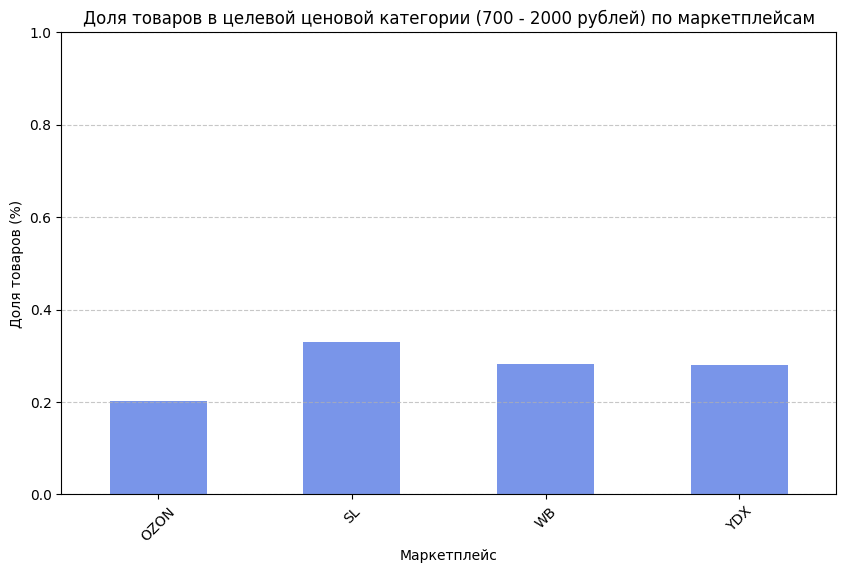

In [ ]:
data_z1_start['is_target_price'] = (data_z1_start['final_price'] >= 700) & (data_z1_start['final_price'] <= 2000)
marketplace_price_distribution = data_z1_start.groupby('market')['is_target_price'].mean()


plt.figure(figsize=(10, 6))
marketplace_price_distribution.plot(kind='bar', color='royalblue', alpha=0.7)
plt.title("Доля товаров в целевой ценовой категории (700 - 2000 рублей) по маркетплейсам")
plt.xlabel("Маркетплейс")
plt.ylabel("Доля товаров (%)")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


SimaLand (SL) – самый перспективный маркетплейс (наибольшая доля товаров в нашей ценовой категории).


Wildberries (WB) и Yandex Market (YDX) – возможные площадки, но требуется анализ конкурентов.


Ozon (OZON) – слабое совпадение с нашей ценовой категорией, возможно, товары либо дешевле, либо дороже.

<ipython-input-28-96575fc1d549>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  marketplace_price_distribution = data_z1_start.groupby(["market", "price_category"]).size().unstack()


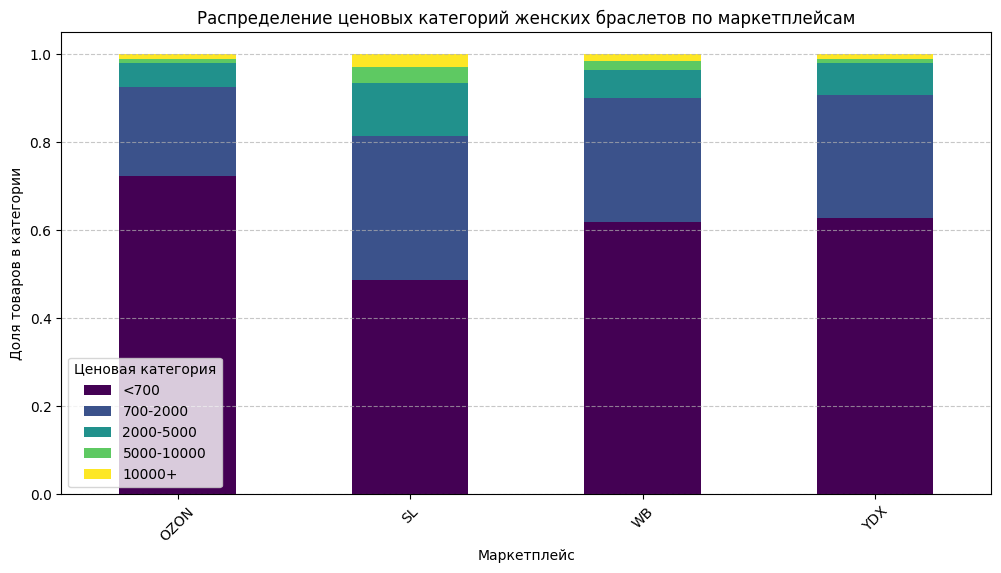

Популярные ценовые категории по маркетплейсам
market
OZON    <700
SL      <700
WB      <700
YDX     <700
Name: price_category, dtype: category
Categories (5, object): ['<700' < '700-2000' < '2000-5000' < '5000-10000' < '10000+']


In [ ]:
bins = [0, 700, 2000, 5000, 10000, float('inf')]
labels = ["<700", "700-2000", "2000-5000", "5000-10000", "10000+"]

data_z1_start["price_category"] = pd.cut(data_z1_start["final_price"], bins=bins, labels=labels, right=False)
marketplace_price_distribution = data_z1_start.groupby(["market", "price_category"]).size().unstack()
marketplace_price_distribution = marketplace_price_distribution.div(marketplace_price_distribution.sum(axis=1), axis=0)

marketplace_price_distribution.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")


plt.title("Распределение ценовых категорий женских браслетов по маркетплейсам")
plt.xlabel("Маркетплейс")
plt.ylabel("Доля товаров в категории")
plt.xticks(rotation=45)
plt.legend(title="Ценовая категория")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


popular_categories = data_z1_start.groupby("market")["price_category"].agg(lambda x: x.value_counts().idxmax())
print("Популярные ценовые категории по маркетплейсам")
print(popular_categories)


- Основной рынок – дешёвые браслеты (<700₽), но там высокая конкуренция.
- Сегмент 700-2000₽ присутствует, особенно на WB, YDX и SL – это наша основная ниша.
- Средний сегмент (2000-5000₽) можно рассматривать для уникальных позиций, так как конкуренция ниже.
- Премиум-сегмент (5000₽+) плохо развит – маркетплейсы ориентированы на бюджетные украшения.


Вывод: Сосредоточиться на цене 700-2000₽, так как этот сегмент имеет спрос, но не перегружен дешевыми товарами.


**Отсортируем нашу ценовую категорию (700 - 2000 рублей)**

In [ ]:
data_z1 = data_z1[(data_z1["final_price"] >= 700) & (data_z1["final_price"] <= 2000)]
data_z1.shape[0]

1915

### Работа с пропусками

In [ ]:
data_z1_start.isna().sum()

,0
product_name,0
brand,6638
is_original,0
final_price,3
old_price,9
discount,9
rating,136
reviews_count,136
delivery_time,0
market,0


Дубликаты были почищены,

теперь посмотрим на пропуски:

In [ ]:
data_z1.isnull().sum()

,0
product_name,0
brand,1580
is_original,0
final_price,0
old_price,3
discount,3
rating,33
reviews_count,33
delivery_time,0
market,0


Так как мало пропусков в столцах final_price, old_price и discount - можем их убрать.

**final_price, old_price и discount**

In [ ]:
data_z1 = data_z1.dropna(subset=['final_price','old_price', 'discount'])

*Посмотрим получше на final_price*

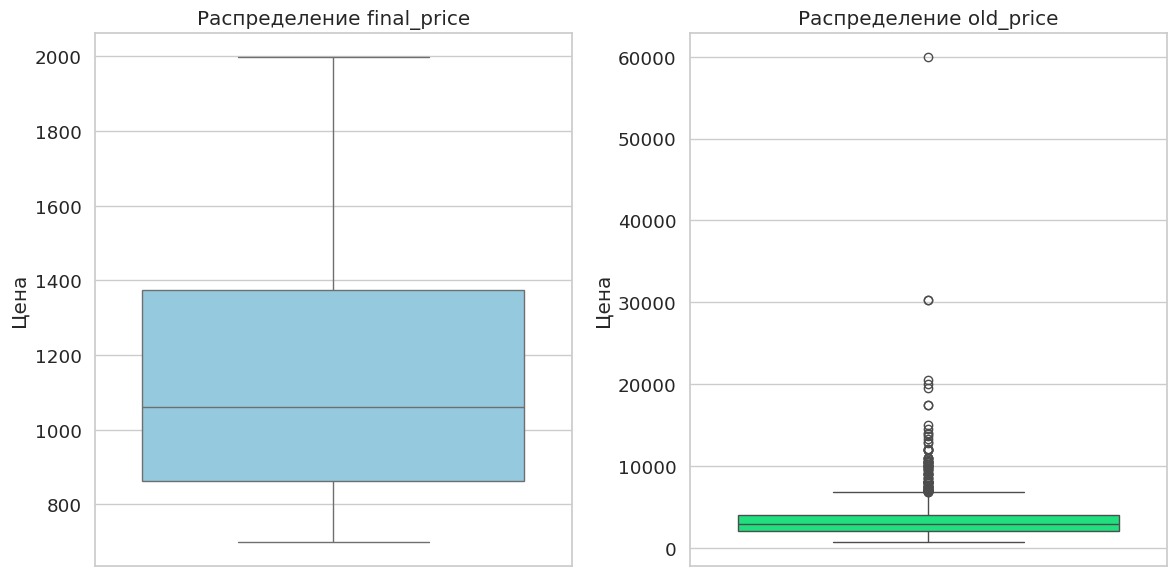

In [ ]:
sns.set(style="whitegrid", font_scale=1.2)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(y=data_z1['final_price'], ax=axes[0], color='skyblue')
axes[0].set_title('Распределение final_price')
axes[0].set_ylabel('Цена')

sns.boxplot(y=data_z1['old_price'], ax=axes[1], color='springgreen')
axes[1].set_title('Распределение old_price')
axes[1].set_ylabel('Цена')

plt.tight_layout()
plt.show()

Можно увидеть по графикам, что старая цена состоит из огромного количества выбросов, и цены сильно разнятся с финальной ценой, так как они значительно больше. Это говорит нам о том, что скидки существенно снимают стоимость товаров, а по большей части используются для искусственного завышения оригнальной цены для видимости большой скидки(да и все мы знаем, что в основном скидки на маркетплейсах используются именно для этого). Поэтому столбец old_price и discount не несут для нас полезной информации, следовательно имеем полное право их удалить.

In [ ]:
del data_z1['old_price']

In [ ]:
del data_z1['discount']

**brand**

Наиболбшее количество пропусков - в значении бренда, поэтому попробуем заполнить эти пропуски на основе столбца с названием товара, используя проверки на наличие английских слов.

In [ ]:
def extract_brand(product_name):
    eng_words = re.findall(r'[A-Za-z]+', product_name)
    return ' '.join(eng_words) if eng_words else None

In [ ]:
data_z1.loc[data_z1["brand"].isna(), "brand"] = data_z1["product_name"].apply(extract_brand)
data_z1.head()

,product_name,brand,is_original,final_price,rating,reviews_count,delivery_time,market
2,"Браслет женский на руку, из натуральных камней...",None,False,792.0,4.9,144.0,6 марта,OZON
36,Браслет женский с натуральным камнем. Женская ...,None,False,947.0,4.9,1491.0,Завтра,OZON
42,"Подарок на 14 февраля, браслет женский",None,False,1644.0,4.9,53.0,Завтра,OZON
57,"Markiz Браслет Серебро 925 пробы, плетение Шопард",Markiz,False,1375.0,5.0,23.0,Завтра,OZON
69,"Браслет серебряный женский 925 пробы, серебро ...",SOKOLOV,True,1047.0,5.0,1164.0,Завтра,OZON


**Итог:**

In [ ]:
data_z1.isnull().sum()

,0
product_name,0
brand,1063
is_original,0
final_price,0
rating,33
reviews_count,33
delivery_time,0
market,0


После проделанных операция у нас нет больше пропусков в столбцах final_price, old_price и discount, а также сократилось число пропусков в столбце brand. Теперь рассмотрим rating и reviews_count.

**rating и reviews_count**

In [ ]:
data_z1['rating'].isna().sum()

33

In [ ]:
data_z1[data_z1['rating'].isna() & data_z1['reviews_count'].isna()].head()

,product_name,brand,is_original,final_price,rating,reviews_count,delivery_time,market,is_target_price
339,"Браслет женский Perle Fiore Luna, бижутерный с...",Perle Fiore Luna,False,1542.0,NaN,NaN,6 марта,OZON,True
396,Браслет две цепочки женский Metall & Pearl Tog...,Metall Pearl Togl Fiore Luna,False,1379.0,NaN,NaN,6 марта,OZON,True
408,Браслет две цепочки женский Bella Pearle Togl ...,Bella Pearle Togl Fiore Luna,False,1583.0,NaN,NaN,6 марта,OZON,True
435,Браслет две цепочки женский Bella Pearle Сarab...,Bella Pearle arabiner Fiore Luna,False,1583.0,NaN,NaN,6 марта,OZON,True
447,"Браслет женский Сфера SHELL WHITE Fiore Luna, ...",SHELL WHITE Fiore Luna,False,1832.0,NaN,NaN,6 марта,OZON,True


In [ ]:
data_z1[data_z1['rating'].isna() & data_z1['reviews_count'].isna()].shape

(33, 9)

Заметим, что все ситуации, когда отсутствовал рейтинг - отсутствовали и комментарии -> значит вероятно во всех этих случаях рейтинг - 0

заполним пропуски 0, так как если не указывается количество отзывов, значит отзывов слишком мало или их нет

In [ ]:
data_z1['rating'] = data_z1['rating'].fillna(0)
data_z1['reviews_count'] = data_z1['reviews_count'].fillna(0)
data_z1.isna().sum()

,0
product_name,0
brand,1063
is_original,0
final_price,0
rating,0
reviews_count,0
delivery_time,0
market,0
is_target_price,0


## Оценка рейтинга и отзывов на маркетплейсах

**Работа с оценками**

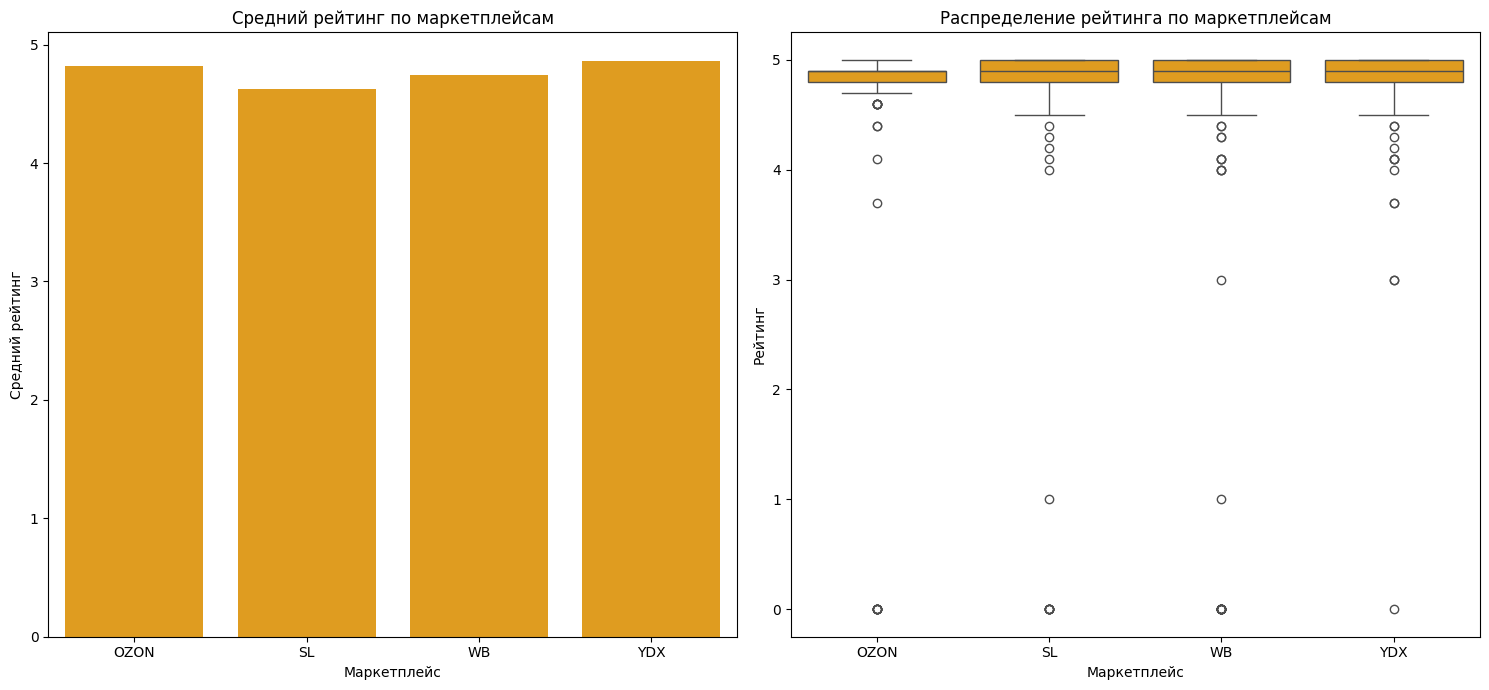

In [ ]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
df_grouped_rating = data_z1.groupby('market')['rating'].mean().reset_index()
sns.barplot(data=df_grouped_rating, x='market', y='rating', color='orange')
plt.xlabel('Маркетплейс')
plt.ylabel('Средний рейтинг')
plt.title('Средний рейтинг по маркетплейсам')

plt.subplot(1, 2, 2)
sns.boxplot(data=data_z1, x='market', y='rating', color='orange')
plt.xlabel('Маркетплейс')
plt.ylabel('Рейтинг')
plt.title('Распределение рейтинга по маркетплейсам')

plt.tight_layout()
plt.show()


**Вывод:** Рейтинг почти одинаковый на всех маркетплейсах (~4.8-5.0).
Разница между платформами минимальна, что подтверждает тенденцию к высокому рейтингу товаров.
Это говорит о том, что рейтинг сам по себе не даёт конкурентного преимущества, так как все товары получают близкие оценки.

**Работа с отзывами**

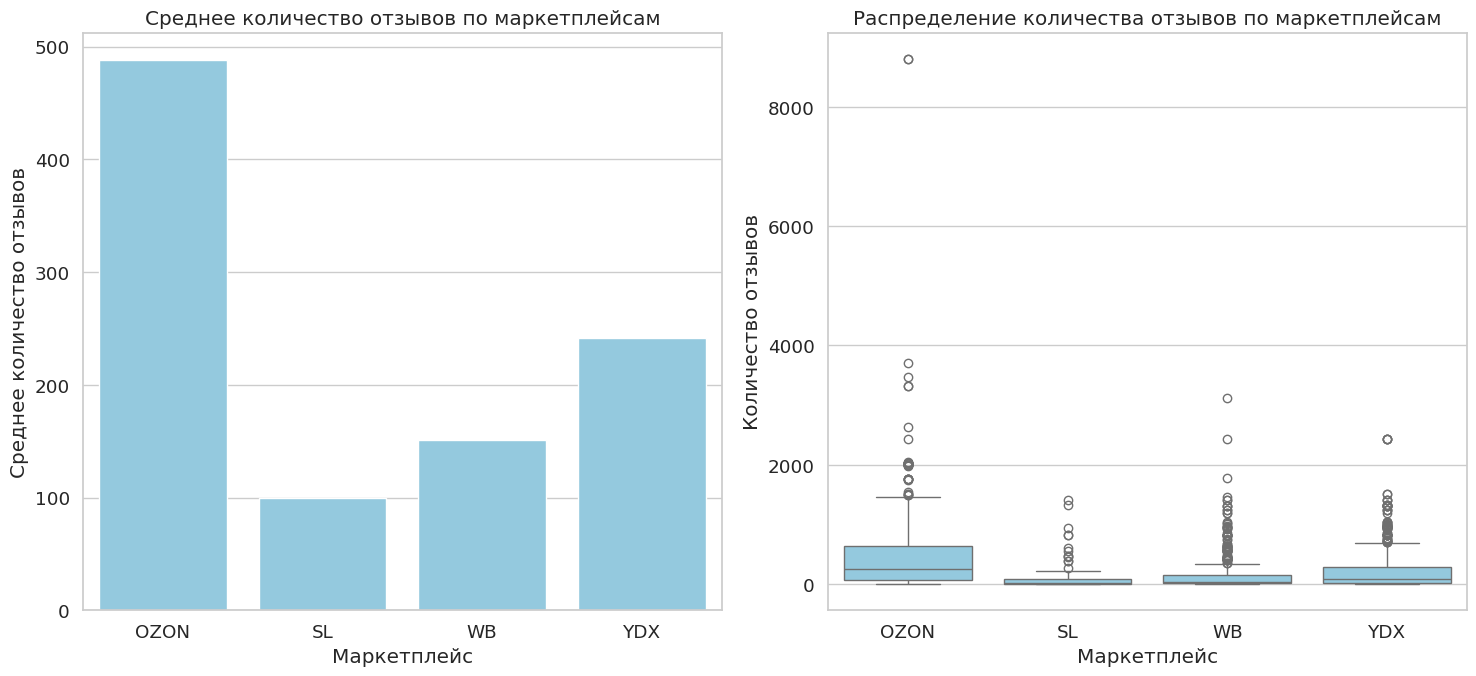

In [ ]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
df_grouped = data_z1.groupby('market')['reviews_count'].mean().reset_index()
sns.barplot(data=df_grouped, x='market', y='reviews_count', color='skyblue')
plt.xlabel('Маркетплейс')
plt.ylabel('Среднее количество отзывов')
plt.title('Среднее количество отзывов по маркетплейсам')

plt.subplot(1, 2, 2)
sns.boxplot(data=data_z1, x='market', y='reviews_count', color='skyblue')
plt.xlabel('Маркетплейс')
plt.ylabel('Количество отзывов')
plt.title('Распределение количества отзывов по маркетплейсам')

plt.tight_layout()
plt.show()

**Вывод:**

На всех маркетплейсах есть значительные выбросы – товары с огромным числом отзывов (1000+). Особенно много отзывов есть в кейсах на Озоне и Вайлдберрисе, что может говорить о возможной накрутке на этих маркетплейсах.

Но OZON видно, что выше среднее значение количества отзывов, чем на других платформах, тогда как на SL и WB в основном небольшое количество отзывов.
Большее количество отзывов на платформе повышает доверие покупателей, что даёт конкурентное преимущество.

## Работа со временем доставки

### Преобразуем текстовые значения в числовые



In [ ]:
data_z1['delivery_time'].value_counts()

,count
delivery_time,
Завтра,1006
6 марта,367
Послезавтра,151
7 марта,127
8 марта,118
9 марта,58
10 марта,17
В корзину,11
19 марта,11


Что означает перейти? Посмотрели на озоне по названию,это товар для взрослых)))) вручную посмотрели, доставка завтра

In [ ]:
data_z1.query('delivery_time == "Перейти"')

,product_name,brand,is_original,final_price,rating,reviews_count,delivery_time,market,is_target_price
3204,"Парные браслеты код Морзе ""Да / П**да"", парные...",None,False,1335.0,4.8,405.0,Перейти,OZON,True
5105,Браслет с надписью Poh,Poh,False,831.0,4.9,28.0,Перейти,WB,True
7143,EXAMPLE Браслет,EXAMPLE,False,1578.0,4.9,7.0,Перейти,WB,True
7172,EXAMPLE Браслет,EXAMPLE,False,1341.0,4.9,7.0,Перейти,WB,True
9811,"Браслет женский и мужской код Морзе ""Ну и х** ...",None,False,888.0,4.9,39.0,Перейти,YDX,True


так как парсинг осуществлялся без входа в аккаунт, то "в корзину" означает, что доступна экспресс-доставка в течение сегодняшнего дня, поэтому обозначим это как 0 дней доставки

In [ ]:
start = datetime.now() - timedelta(days=1)
start

datetime.datetime(2025, 3, 3, 7, 27, 51, 40506)

In [ ]:
months = {
    'января': 1, 'февраля': 2, 'марта': 3, 'апреля': 4,
    'мая': 5, 'июня': 6, 'июля': 7, 'августа': 8,
    'сентября': 9, 'октября': 10, 'ноября': 11, 'декабря': 12
}
def delivery(col):
    col = col.lower().strip()
    if 'за' in col:
        return 0
    elif col == 'в корзину':
        return 0
    elif col == 'сегодня':
        return 0
    elif col == 'перейти':
        return 1
    elif col == 'завтра':
        return 1
    elif col == 'послезавтра':
        return 2
    else:
        day, month = col.split()
        date = datetime(start.year, months[month], int(day))
        if date < start:
            date = date.replace(year=start.year + 1)
        return (date - start).days
data_z1['delivery_time'] = data_z1['delivery_time'].apply(delivery)

In [ ]:
data_z1

,product_name,brand,is_original,final_price,rating,reviews_count,delivery_time,market,is_target_price
2,"Браслет женский на руку, из натуральных камней...",None,False,792.0,4.9,144.0,2,OZON,True
36,Браслет женский с натуральным камнем. Женская ...,None,False,947.0,4.9,1491.0,0,OZON,True
42,"Подарок на 14 февраля, браслет женский",None,False,1644.0,4.9,53.0,0,OZON,True
57,"Markiz Браслет Серебро 925 пробы, плетение Шопард",Markiz,False,1375.0,5.0,23.0,0,OZON,True
69,"Браслет серебряный женский 925 пробы, серебро ...",SOKOLOV,True,1047.0,5.0,1164.0,0,OZON,True
...,...,...,...,...,...,...,...,...,...
10302,Браслет Bar Браслет на ногу,Bar,False,910.0,4.9,63.0,0,YDX,True
10304,Браслет женский серебряный 925 пробы плетение ...,Оригинал,False,784.0,4.9,16.0,0,YDX,True
10311,Браслет с лазерной гравировкой в подарок дочке...,None,False,1722.0,4.9,220.0,4,YDX,True
10317,Браслет с руной Ансуз натуральные камни Оникс ...,None,False,1165.0,4.9,473.0,0,YDX,True


### Распеделение дней доставки по маркетплейсам

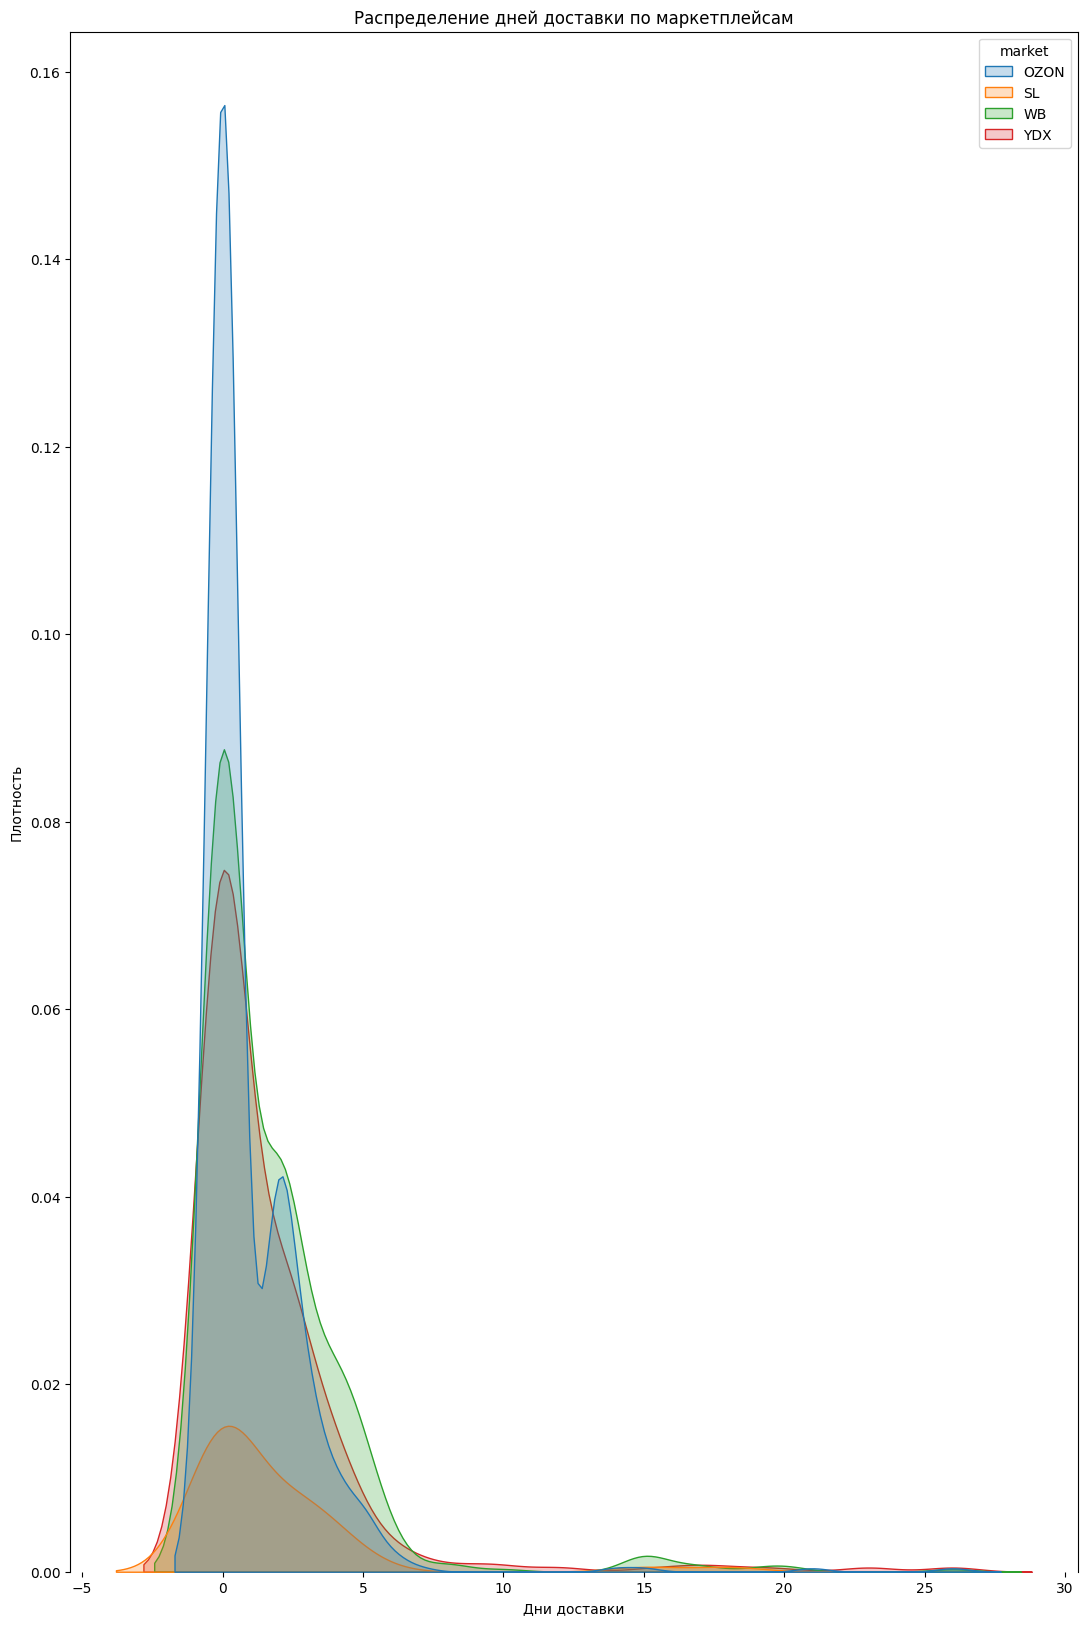

In [ ]:
plt.figure(figsize=(13, 20))
ax = sns.kdeplot(data=data_z1, x='delivery_time', hue='market', fill=True)
ax.spines['bottom'].set_visible(False)
plt.xlabel('Дни доставки')
plt.ylabel('Плотность')
plt.title('Распределение дней доставки по маркетплейсам')
plt.show()

**Вывод:**  Посмотрев распределение, можно увидеть, что в принципе все маркетплейсы распределены нормально, чаще всего встречается быстрая доставка: от 0 до 2 дней по каждому из маркетплейсов, но также присутствуют выбросы в виде долгой доставки(например 30 дней). График особо не способствует выбору платформы.

## Матрица корреляции числовых признаков

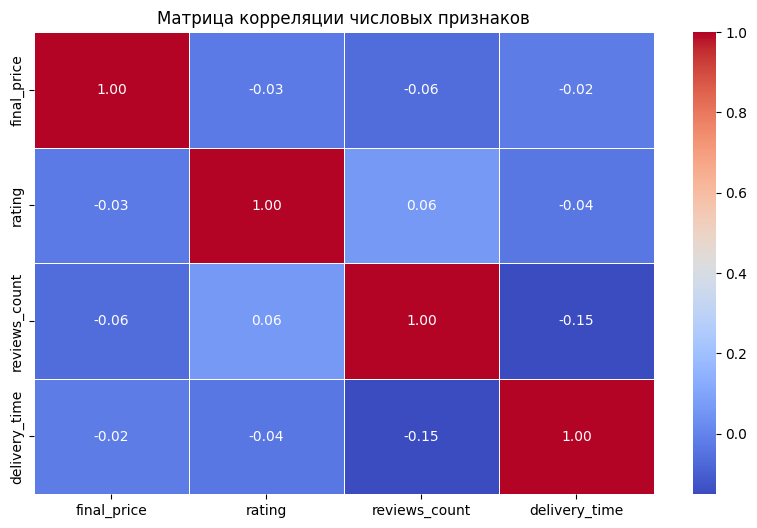

In [ ]:
corr_matrix = data_z1.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Матрица корреляции числовых признаков")
plt.show()


**Вывод:**  числовые признаки не коррелируют друг с другом

## Оценка важности оригинальности товаров

In [ ]:
count_rev_og = data_z1[data_z1['is_original'] == True]['reviews_count'].count()
count_rev_not_og = data_z1[data_z1['is_original'] == False]['reviews_count'].count()
print(f'Количество отзывов для оригинальных фирм: {count_rev_og}')
print(f'Количество отзывов для неоригинальных фирм: {count_rev_not_og}')

Количество отзывов для оригинальных фирм: 140
Количество отзывов для неоригинальных фирм: 1775


In [ ]:
mean_rating_og = data_z1[data_z1['is_original'] == True]['rating'].mean()
mean_rating_not_og = data_z1[data_z1['is_original'] == False]['rating'].mean()
print(f"Средняя оценка для оригинальных фирм: {mean_rating_og}")
print(f"Средняя оценка для неоригинальных фирм: {mean_rating_not_og}")

Средняя оценка для оригинальных фирм: 4.819285714285715
Средняя оценка для неоригинальных фирм: 4.789295774647886


**зависимость разных признаков от оригинальности товара**

In [ ]:
data_z1.groupby('is_original')['final_price'].describe()

,count,mean,std,min,25%,50%,75%,max
is_original,,,,,,,,
False,1775.0,1125.981972,334.408200,700.0,861.00,1043.0,1340.0,1999.0
True,140.0,1385.664286,381.728662,702.0,1024.75,1452.0,1717.0,1991.0


In [ ]:
data_z1.groupby('is_original')['reviews_count'].describe()

,count,mean,std,min,25%,50%,75%,max
is_original,,,,,,,,
False,1772.0,291.685666,526.470125,0.0,19.0,90.0,373.0,8806.0
True,140.0,152.800000,296.927605,0.0,19.0,50.5,128.0,1983.0


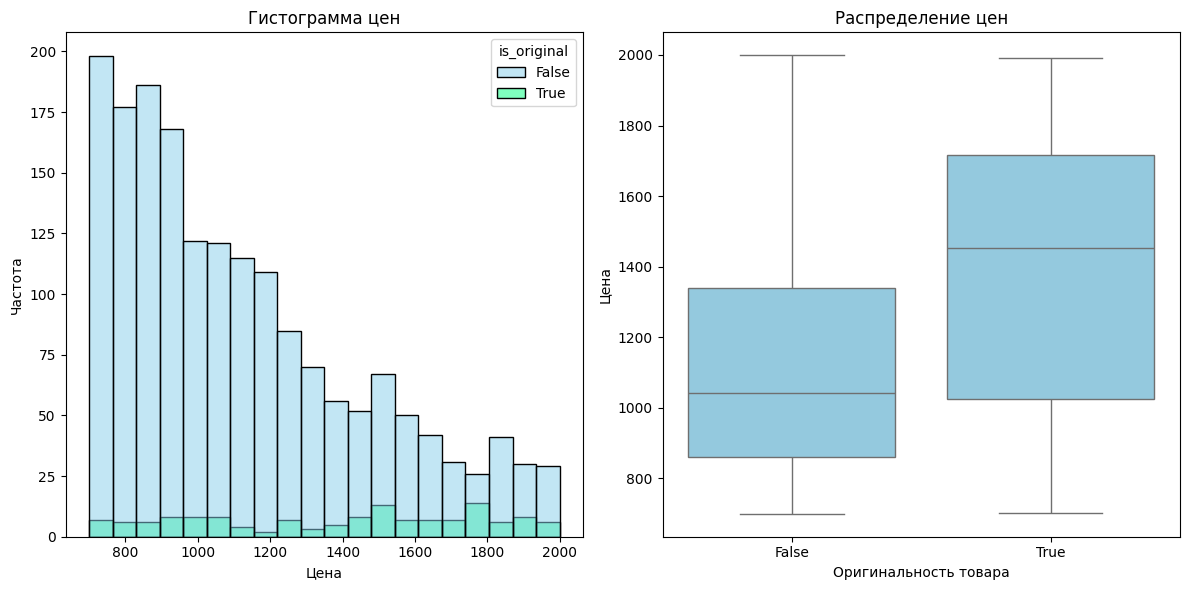

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=data_z1, x='final_price', hue='is_original',bins = 20, palette=['skyblue', 'springgreen'])
plt.title('Гистограмма цен')
plt.xlabel('Цена')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x='is_original', y='final_price', data=data_z1, color='skyblue')
plt.title('Распределение цен')
plt.xlabel('Оригинальность товара')
plt.ylabel('Цена')

plt.tight_layout()
plt.show()

**Вывод:** Можно увидеть, что оригинальных товаров меньше, чем неоригинальных, по каждой из стоимости в нашем диапазоне, что логично по каждому из маркетплейсов. Можно предположить, что данный признак не сильно важен при анализе. Товары без рейтинга присутвуют в данной ценовой категории и преобладают.

## Работа с маркетплейсами

**Распределение товаров по маркетплейсам**

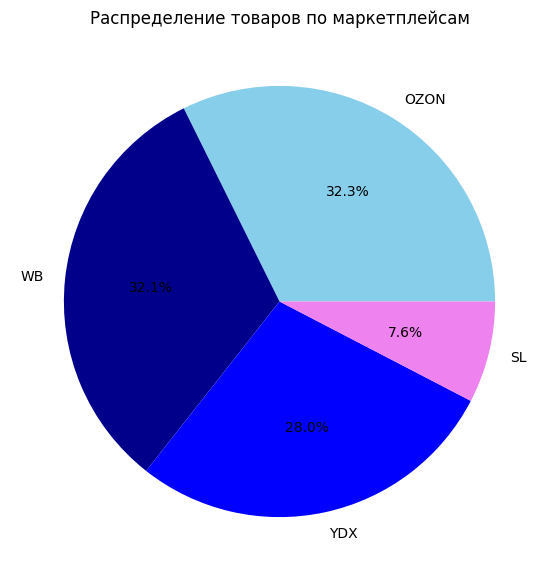

In [ ]:
plt.figure(figsize=(15, 7))

market_counts = data_z1['market'].value_counts()

plt.pie(market_counts, labels=market_counts.index, autopct="%1.1f%%", colors=['skyblue', 'darkblue', 'blue', 'violet'])
plt.title('Распределение товаров по маркетплейсам')
plt.show()

**Вывод**: Можно увидеть, что большие части составляют озон и выйлдберис с 32.1% и 32.3%, также велика доля яндекс маркета. Sila Land занимает же лишь 7.6%, это говорит нам о том, что он менее популярный среди потребителей, следовательно он становится менее приоритетным.

**Распределение оценки ползователя по каждому из маркетплейсов**

Text(0, 0.5, 'Оценка пользователя')

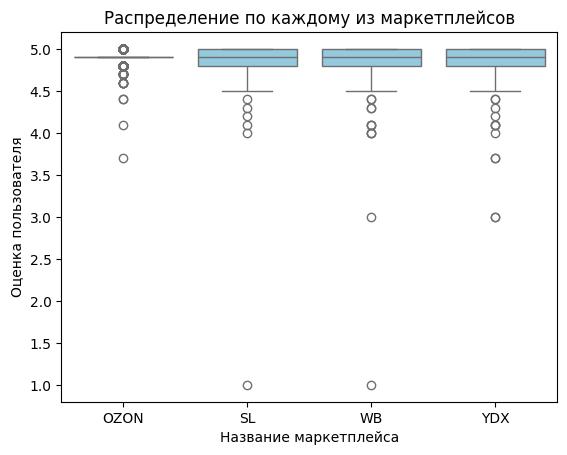

In [ ]:
sns.boxplot(x='market', y='rating', data= data_z1[data_z1['rating'] > 0], color='skyblue')
plt.title('Распределение оценки ползователя по каждому из маркетплейсов')
plt.xlabel('Название маркетплейса')
plt.ylabel('Оценка пользователя')

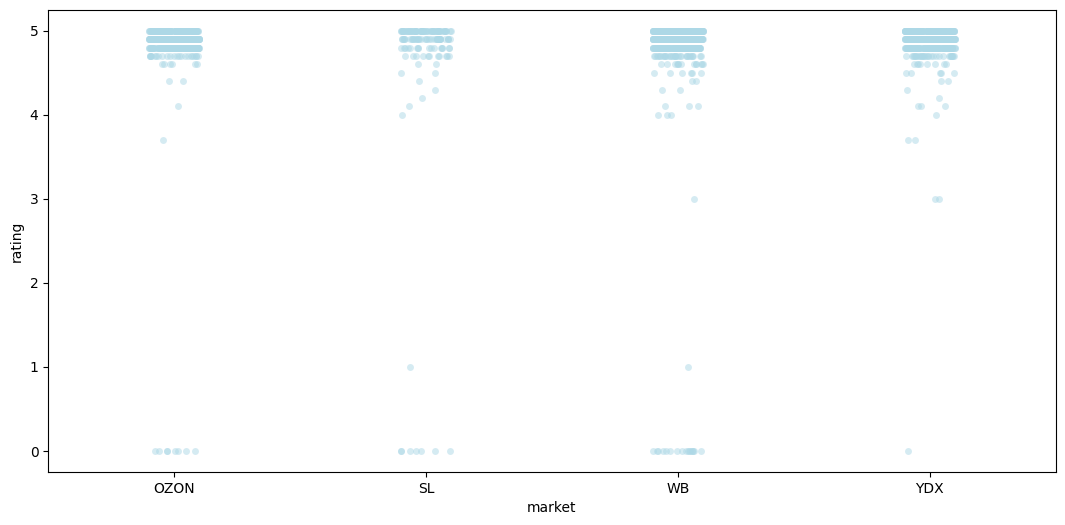

In [ ]:
plt.figure(figsize=(13, 6))
sns.stripplot(x='market', y='rating', data=data_z1, color='lightblue', alpha=0.5, jitter=True)
plt.title('Распределение оценки ползователя по каждому из маркетплейсов')
plt.xlabel('Название маркетплейса')
plt.ylabel('Оценка пользователя')
plt.show()

**Вывод:** Можно увидеть, что по каждому из маркетплейсов ставятся приемущетсвенно высокие оценки в диапазоне от 4.7 до 5.0, присутсвуют и оценки 0, но это означает, что на данные товары пока не оставили никакой отзыв. А оценки ниже 4 практически не встречаются в нашей выборке

##Конкурентный анализ по брендам

На данном этапе вводим новый признак, чтобы относительно него посмотреть наших основных конкурентов на каждом из маркетплейсов. Умножим количество отзывов на рейтинг и проведем нормировку. Данный признак представляет из себя взвешенный рейтинг, который учитывает не только оценку, но и количество отзывов по ней. Таким образом, товары, имеющие высокий рейтинг и большое количество отзывов будут иметь больший вес(так как, даже на нашей примере, при выборе товаров, высокая оценка, с маленьким количеством отзывов -- оценка 5.0 с количеством отзывов 1 -- вызывает меньше доверия, чем -- оценка 4.8 со 100 отзывами)

In [ ]:
data_z1['total_rate'] = data_z1['rating'] * data_z1['reviews_count'] * 0.0001

comp_brands_ozon = data_z1[data_z1['market'] == 'OZON']["brand"].unique()
comp_brands_wb = data_z1[data_z1['market'] == 'WB']["brand"].unique()
comp_brands_sl = data_z1[data_z1['market'] == 'SL']["brand"].unique()
comp_brands_ydx = data_z1[data_z1['market'] == 'YDX']["brand"].unique()



comp_brands_ozon = data_z1[data_z1['market'] == 'OZON']
comp_brands_wb = data_z1[data_z1['market'] == 'WB']
comp_brands_sl = data_z1[data_z1['market'] == 'SL']
comp_brands_ydx = data_z1[data_z1['market'] == 'YDX']

In [ ]:
av_rating_comp_ozon = comp_brands_ozon.groupby("brand")["total_rate"].mean()
av_rating_comp_ozon = av_rating_comp_ozon.sort_values(ascending=False).head(5)

av_rating_comp_wb = comp_brands_wb.groupby("brand")["total_rate"].mean()
av_rating_comp_wb = av_rating_comp_wb.sort_values(ascending=False).head(5)

av_rating_comp_ydx = comp_brands_ydx.groupby("brand")["total_rate"].mean()
av_rating_comp_ydx = av_rating_comp_ydx.sort_values(ascending=False).head(5)

av_rating_comp_sl = comp_brands_sl.groupby("brand")["total_rate"].mean()
av_rating_comp_sl = av_rating_comp_sl.sort_values(ascending=False).head(5)

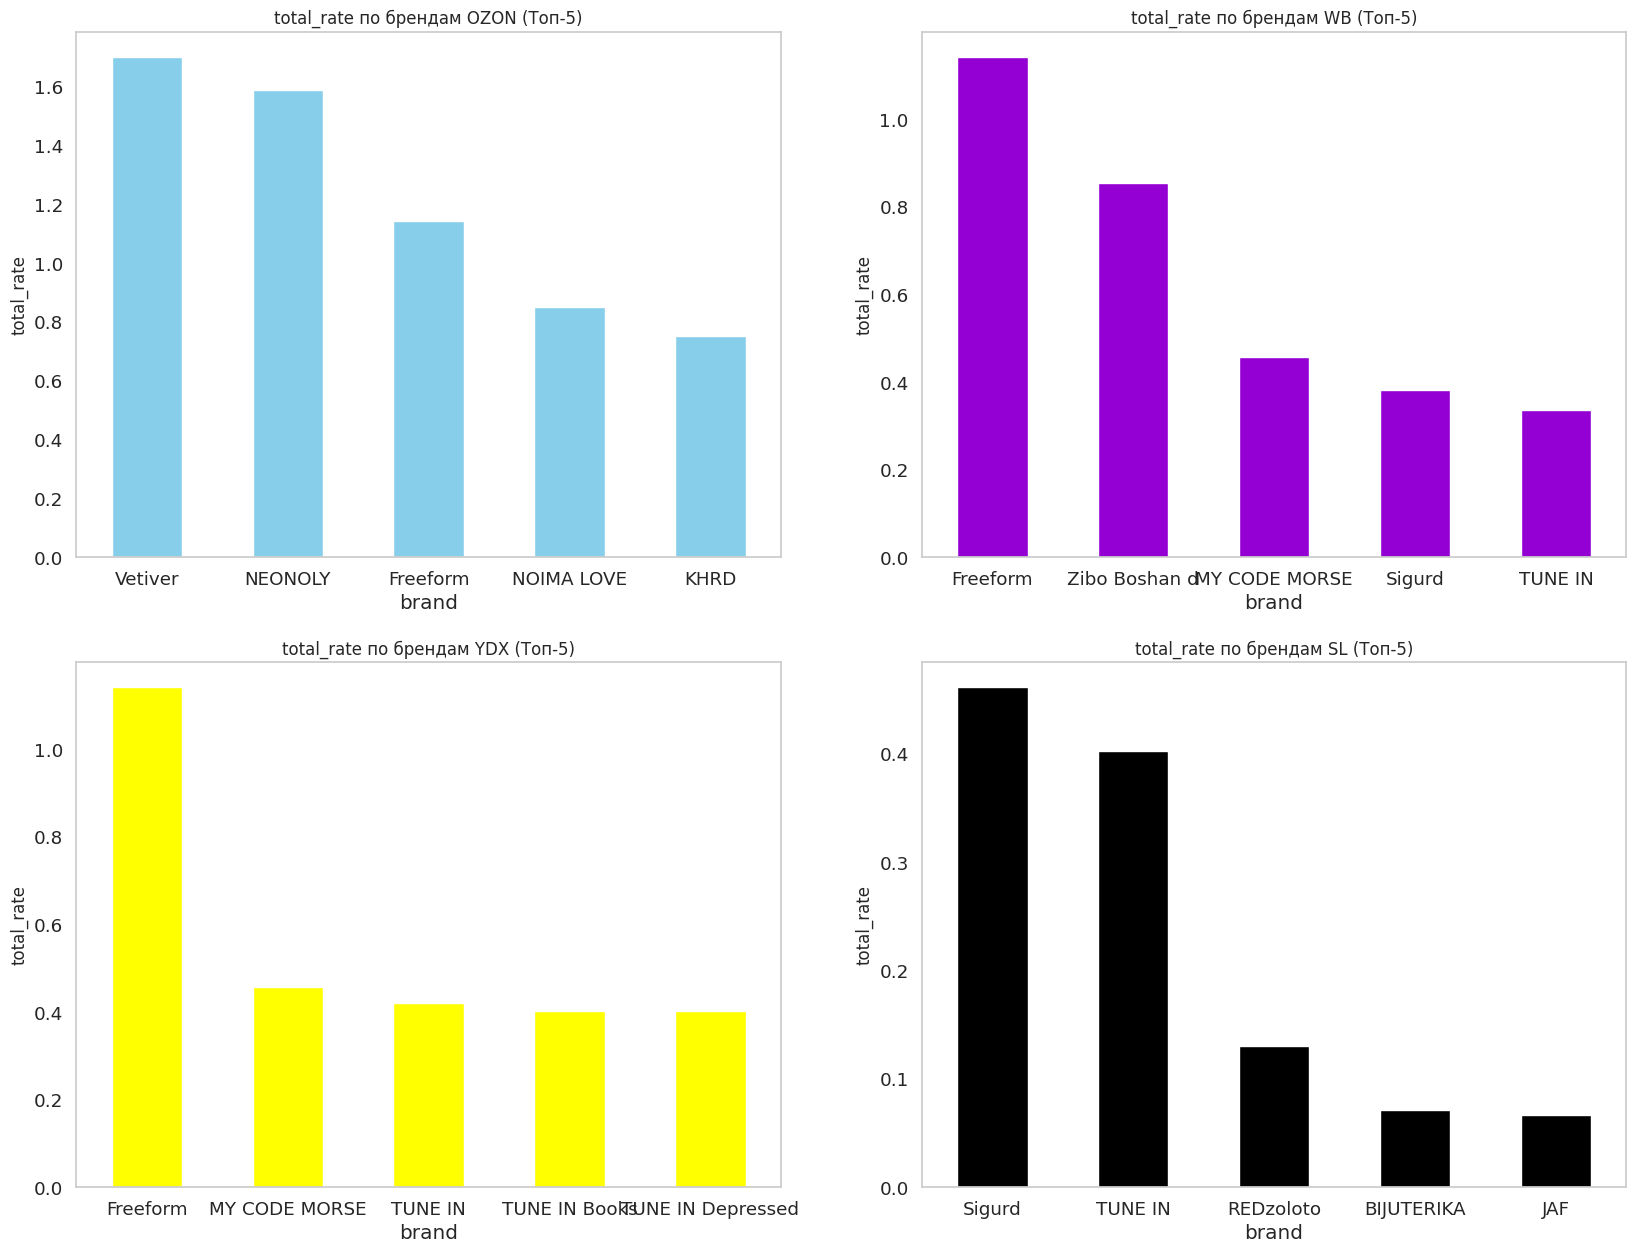

In [ ]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
av_rating_comp_ozon.plot(kind='bar', color='skyblue')
plt.title('total_rate по брендам OZON (Топ-5)', fontsize=12)
plt.ylabel('total_rate', fontsize=12)
plt.grid()
plt.xticks(rotation=0)


plt.subplot(2, 2, 2)
av_rating_comp_wb.plot(kind='bar', color='darkviolet')
plt.title('total_rate по брендам WB (Топ-5)', fontsize=12)
plt.ylabel('total_rate', fontsize=12)
plt.grid()
plt.xticks(rotation=0)


plt.subplot(2, 2, 3)
av_rating_comp_ydx.plot(kind='bar', color='yellow')
plt.title('total_rate по брендам YDX (Топ-5)', fontsize=12)
plt.ylabel('total_rate', fontsize=12)
plt.grid()
plt.xticks(rotation=0)


plt.subplot(2, 2, 4)
av_rating_comp_sl.plot(kind='bar', color='black')
plt.title('total_rate по брендам SL (Топ-5)', fontsize=12)
plt.ylabel('total_rate', fontsize=12)
plt.grid()
plt.xticks(rotation=0)

plt.show()

Тут мы обнаружили, что при нашем выявлении названий брендов через английский язык вышла небольшая заминка с брендом Tune in -- избавимся от нее

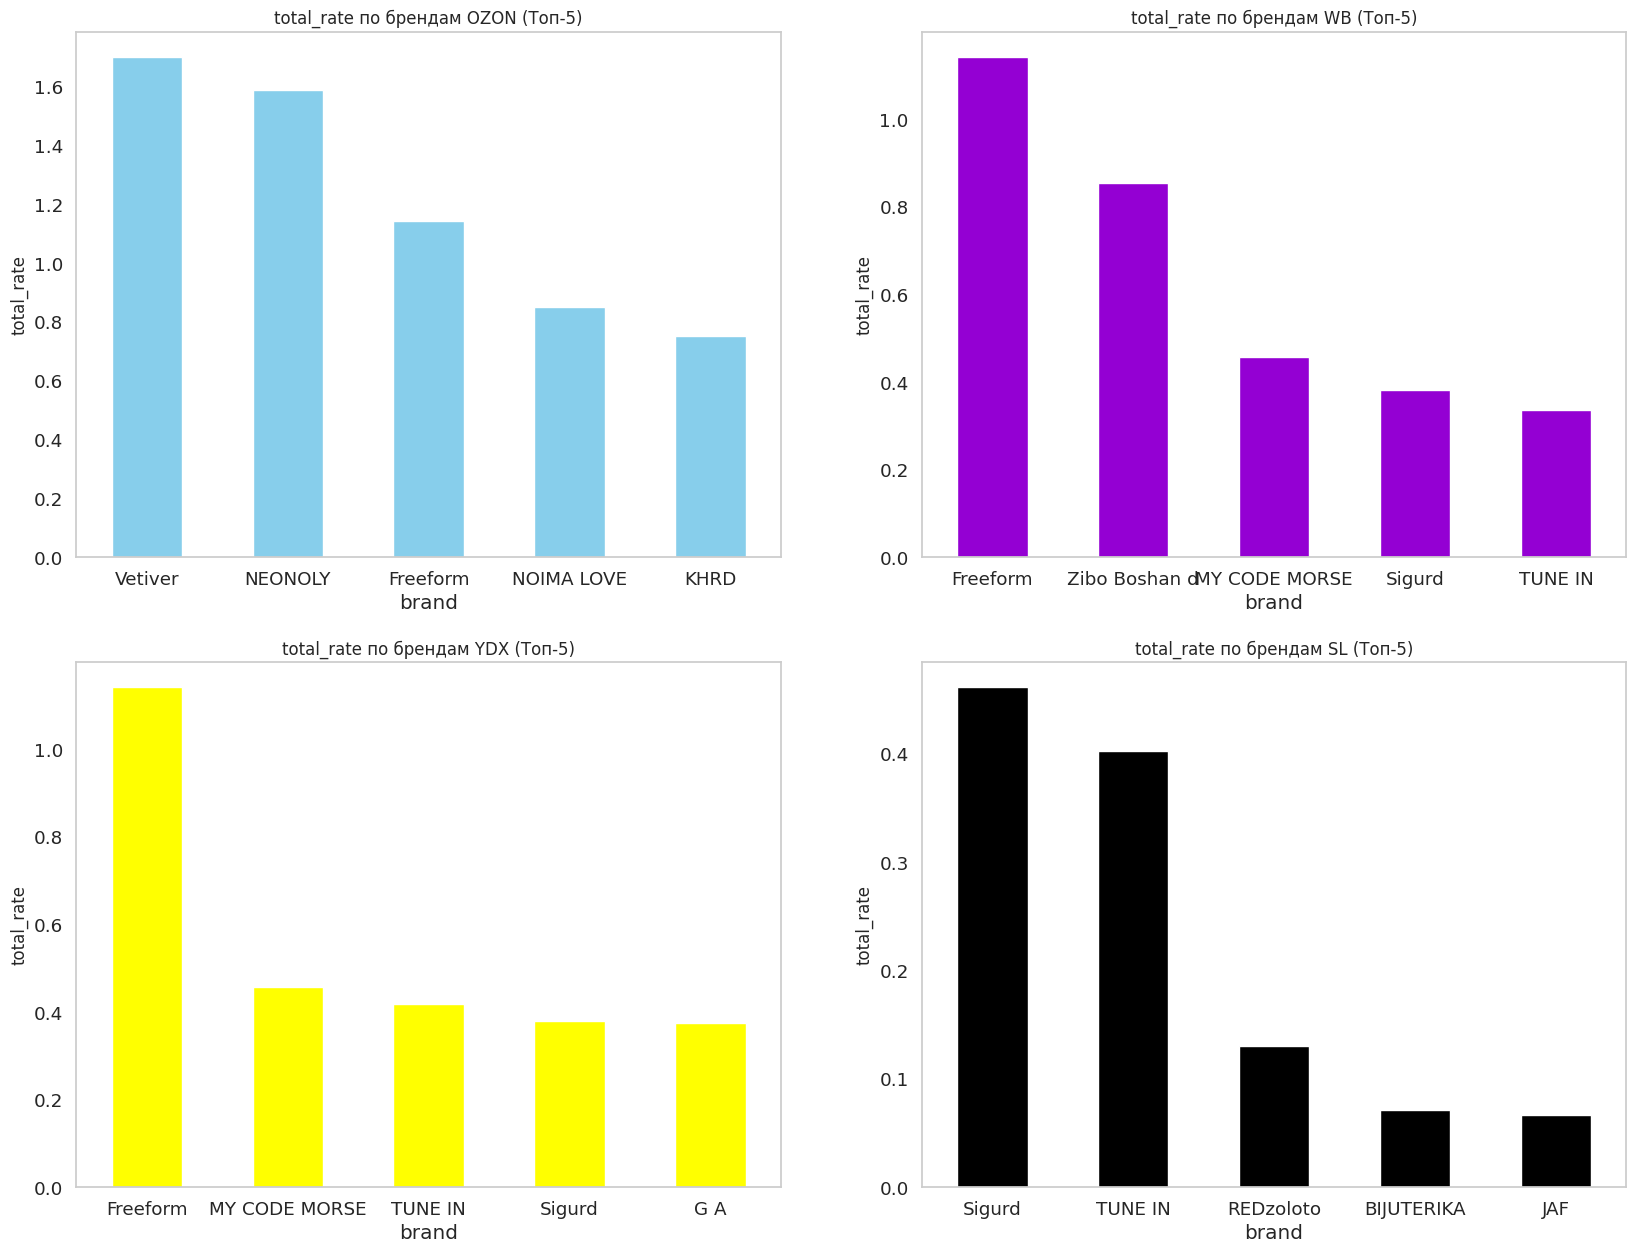

In [ ]:
data_z1['brand'] = data_z1['brand'].replace({'TUNE IN Books': 'TUNE IN', 'TUNE IN Depressed': 'TUNE IN'})
comp_brands_ozon = data_z1[data_z1['market'] == 'OZON']
comp_brands_wb = data_z1[data_z1['market'] == 'WB']
comp_brands_sl = data_z1[data_z1['market'] == 'SL']
comp_brands_ydx = data_z1[data_z1['market'] == 'YDX']

av_rating_comp_ozon = comp_brands_ozon.groupby("brand")["total_rate"].mean()
av_rating_comp_ozon = av_rating_comp_ozon.sort_values(ascending=False).head(5)

av_rating_comp_wb = comp_brands_wb.groupby("brand")["total_rate"].mean()
av_rating_comp_wb = av_rating_comp_wb.sort_values(ascending=False).head(5)

av_rating_comp_ydx = comp_brands_ydx.groupby("brand")["total_rate"].mean()
av_rating_comp_ydx = av_rating_comp_ydx.sort_values(ascending=False).head(5)

av_rating_comp_sl = comp_brands_sl.groupby("brand")["total_rate"].mean()
av_rating_comp_sl = av_rating_comp_sl.sort_values(ascending=False).head(5)

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
av_rating_comp_ozon.plot(kind='bar', color='skyblue')
plt.title('total_rate по брендам OZON (Топ-5)', fontsize=12)
plt.ylabel('total_rate', fontsize=12)
plt.grid()
plt.xticks(rotation=0)


plt.subplot(2, 2, 2)
av_rating_comp_wb.plot(kind='bar', color='darkviolet')
plt.title('total_rate по брендам WB (Топ-5)', fontsize=12)
plt.ylabel('total_rate', fontsize=12)
plt.grid()
plt.xticks(rotation=0)


plt.subplot(2, 2, 3)
av_rating_comp_ydx.plot(kind='bar', color='yellow')
plt.title('total_rate по брендам YDX (Топ-5)', fontsize=12)
plt.ylabel('total_rate', fontsize=12)
plt.grid()
plt.xticks(rotation=0)


plt.subplot(2, 2, 4)
av_rating_comp_sl.plot(kind='bar', color='black')
plt.title('total_rate по брендам SL (Топ-5)', fontsize=12)
plt.ylabel('total_rate', fontsize=12)
plt.grid()
plt.xticks(rotation=0)

plt.show()

**Посмотрим лидеров:**

OZON: Бренды Vetiver, NEONOLY, Freeform, NOIMA LOVE и KHRD имеют высокие значения total_rate. Значит, что эти бренды не только имеют высокий рейтинг, но и значительное количество отзывов, что говорит об их популярности и доверии со стороны потребителей

WB: Бренды Freeform, Zibo Boshan, MY CODE MORSE, Sigurd и TUNE IN также демонстрируют высокие значения total_rate, что делает их ключевыми конкурентами на этой платформе


YDX: Бренды Freeform, MY CODE MORSE, TUNE IN, Sigurd и G A лидируют по total_rate, что указывает на их сильные позиции на этом маркетплейсе.


SL (Sila Land): Бренды Sigurd, TUNE IN, REDzoloto, BIJUTERIKA и JAF имеют более низкие значения total_rate по сравнению с другими платформами, что может говорить о меньшей популярности или меньшем количестве отзывов

**Выводы:**

OZON: данная платформа демонстрируют наиболее высокие значения total_rate для топовых брендов, что указывает на высокую конкуренцию среди продавцов. То есть присутствует высокая конкуренция и нужно обладать хорошей стратегией при выходе на данный маркетплейс

YDX и WB также демонстрируют высокие значения в колонке total_rate, конкуренция присутствует, но платформы остаются привлекательными для новых брендов, так как конкуренция может быть менее интенсивной


Sila Land показывает низкие значения total_rate, это может указывать на меньшую популярность платформы или же, что бренды здесь менее активны. Но так как доля данного маркетплейса мала, данные результаты продолжают уменьшать заинтересованность в данной платформе для нас

## Работа именно с жемчужными браслетыми

**Часто встречающиеся слова в названиях браслетов (без общих терминов) и их связь с ценой**

для всех цен:

<ipython-input-56-01f78d0d10d4>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(words, rotation=45, ha='right')


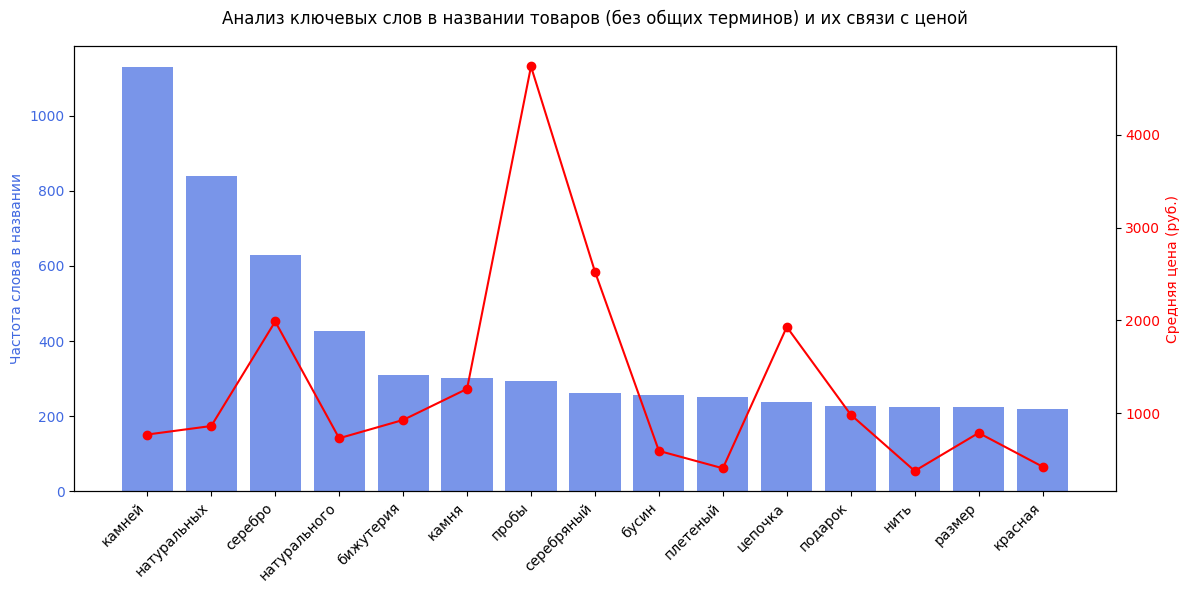

In [ ]:
from collections import Counter

all_words = " ".join(data_z1_start['product_name']).lower().split()
word_counts = Counter([word for word in all_words if len(word) > 3])
excluded_words = {"браслет", "браслеты", "женский", "мужской", "руку"}
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)
filtered_words = [(word, count) for word, count in common_words if word not in excluded_words]

words, counts = zip(*filtered_words)

avg_prices = [data_z1_start[data_z1_start['product_name'].str.contains(word, case=False, na=False)]['final_price'].mean() for word in words]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(words, counts, color='royalblue', alpha=0.7, label='Частота')
ax1.set_ylabel("Частота слова в названии", color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.set_xticklabels(words, rotation=45, ha='right')


ax2 = ax1.twinx()
ax2.plot(words, avg_prices, color='red', marker='o', label='Средняя цена')
ax2.set_ylabel("Средняя цена (руб.)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle("Анализ ключевых слов в названии товаров (без общих терминов) и их связи с ценой")
fig.tight_layout()
plt.show()


Модно увидеть, что наиболее популярные товары соедржат слова -- камней, натуральных, серебро. Наибольший ценник выставляется при наличии слов -- серебрянный, проба, что логично, так как это говорит о хорошем качестве товара. Низкий ценовой сегмент включает в себя слова -- нить, красная, плетеный, так как они ассоциируются с проостыми, базовыми изделиями.

для нашего ценого сегмента

<ipython-input-58-57bedd66aa3d>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(words, rotation=45, ha='right')


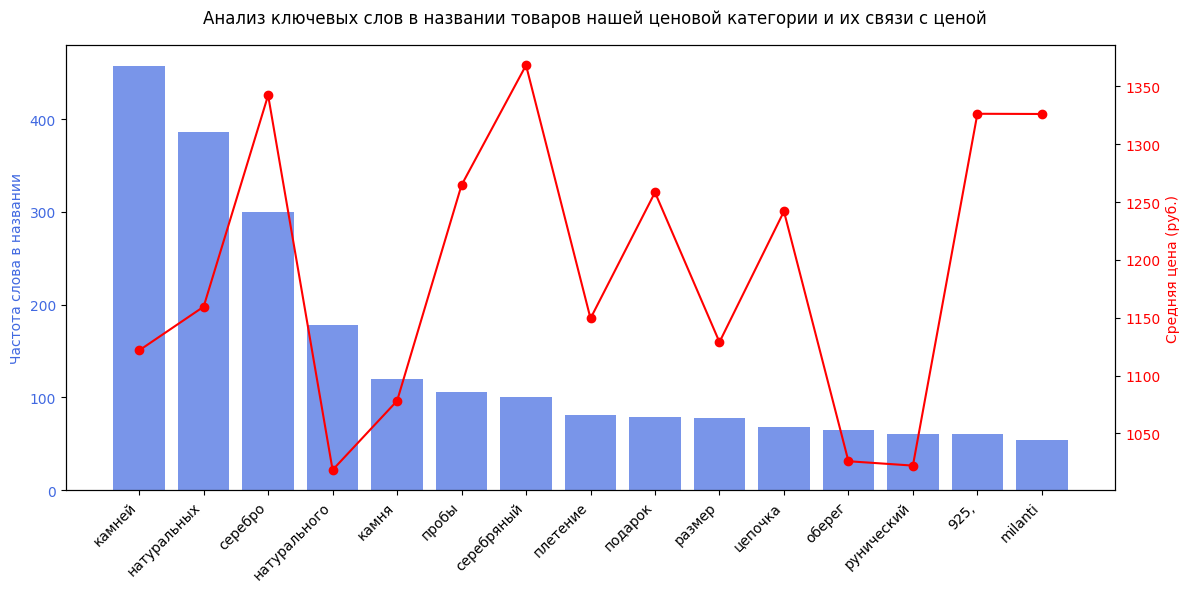

In [ ]:
all_words = " ".join(data_z1['product_name']).lower().split()
word_counts = Counter([word for word in all_words if len(word) > 3])
excluded_words = {"браслет", "браслеты", "женский", "мужской", "руку"}
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)
filtered_words = [(word, count) for word, count in common_words if word not in excluded_words]

words, counts = zip(*filtered_words)

avg_prices = [data_z1[data_z1['product_name'].str.contains(word, case=False, na=False)]['final_price'].mean() for word in words]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(words, counts, color='royalblue', alpha=0.7, label='Частота')
ax1.set_ylabel("Частота слова в названии", color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.set_xticklabels(words, rotation=45, ha='right')


ax2 = ax1.twinx()
ax2.plot(words, avg_prices, color='red', marker='o', label='Средняя цена')
ax2.set_ylabel("Средняя цена (руб.)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle("Анализ ключевых слов в названии товаров нашей ценовой категории и их связи с ценой")
fig.tight_layout()
plt.show()


Часто встречаются слова "камней", "натуральных", "серебро", "натурального" – что подтверждает, что многие товары акцентируют внимание на составе изделия.
Слово "подарок" также довольно популярно, что указывает на ориентацию части товаров на подарочный сегмент.
"Плетение", "цепочка", "размер" – указывают на детали дизайна и характеристики изделия.


Самые дорогие товары содержат слова "серебро", "925", "проба" "серебряный", "milanti"(ювелирные украшения состоящие из серебра 925 пробы) – что логично, так как серебро дороже обычных бижутерных сплавов

"Подарки" -- находится в высокой-средней категории, видимо наличие подарочного сегмента сказывается на стоимости товара

"Натуральный", "камней" – также связаны с более высокой средней ценой, так как подчеркивают использование натуральных материалов и эксклюзивность

Слова "плетение", "цепочка", "размер" относятся к среднему ценовому сегменту, так как они больше описывают особенности дизайна, но не поднимают ценность товара

"Рунический", "оберег" – самые дешевые из популярных слов, вероятно, такие браслеты ориентированы на массовый рынок.


**Теперь можно посмотреть количество браслетов именно с жемчугом (по вхождению "жемч" в название товара)**

In [ ]:
df_pearl = data_z1_start[data_z1_start['product_name'].str.contains("жемчуг|жемчужный|pearl", case=False, na=False)]
df_pearl.shape[0]


141

У нас получилось найти 141 товар, это около 2% от всех женских браслетов, что довольно много.

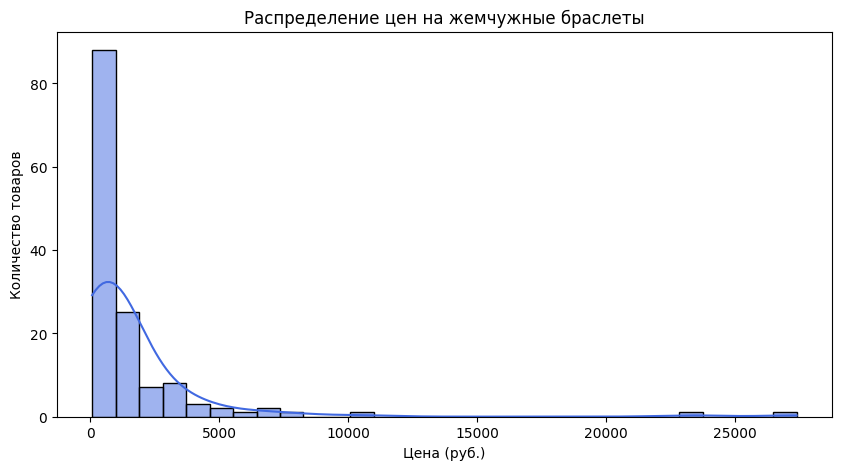

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_pearl['final_price'], bins=30, kde=True, color='royalblue')
plt.title("Распределение цен на жемчужные браслеты")
plt.xlabel("Цена (руб.)")
plt.ylabel("Количество товаров")
plt.show()

**Выводы:**

Наш ценовой диапазон (700–2000 рублей) вписывается в наиболее часто встречающийся на рынке (100–2000 рублей), говорит о том, что мы находимся в основной ценовой зоне, где сосредоточена большая часть спроса. Это хорошо, так мы ориентируемся на широкую аудиторию, которая привыкла к таким ценам

Но: В диапазоне 100–2000 рублей конкуренция может быть высокой, так как это основной сегмент рынка. Необходимо будет выделяться среди конкурентов за счет качества, маркетинга или уникальных характеристик товаров, но так как мы выше стоимости позиций 100-700 рублей, наш товар является более премиальным относительно большинства, нацеленный на средний класс, который готов заплатить чуть больше за качество и уникальность товара


<ipython-input-62-6f28f479286c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_pearl_market.index, y=df_pearl_market.values, palette="coolwarm")


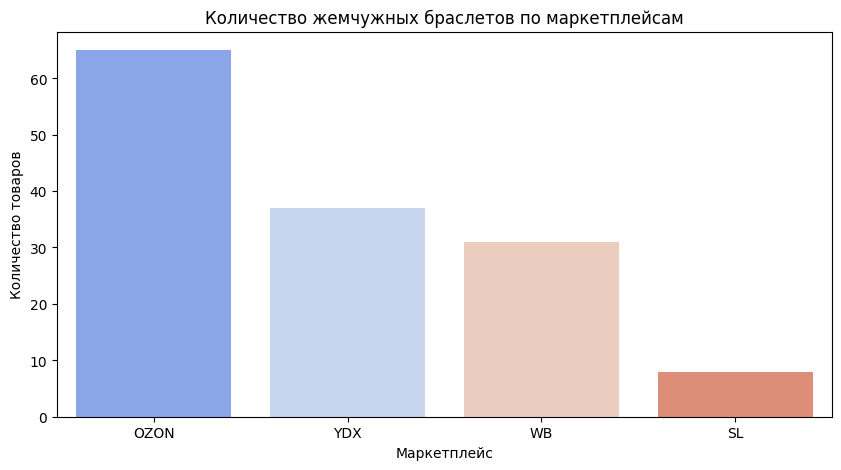

In [ ]:
plt.figure(figsize=(10, 5))
df_pearl_market = df_pearl['market'].value_counts()
sns.barplot(x=df_pearl_market.index, y=df_pearl_market.values, palette="coolwarm")
plt.title("Количество жемчужных браслетов по маркетплейсам")
plt.xlabel("Маркетплейс")
plt.ylabel("Количество товаров")
plt.show()

Можно увидеть, что озон лидирует среду сових конкурентов по количеству жемчужных браслетов на рынке

<ipython-input-63-851fdee37853>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pearl_rating, x='market', y='rating', palette="coolwarm")


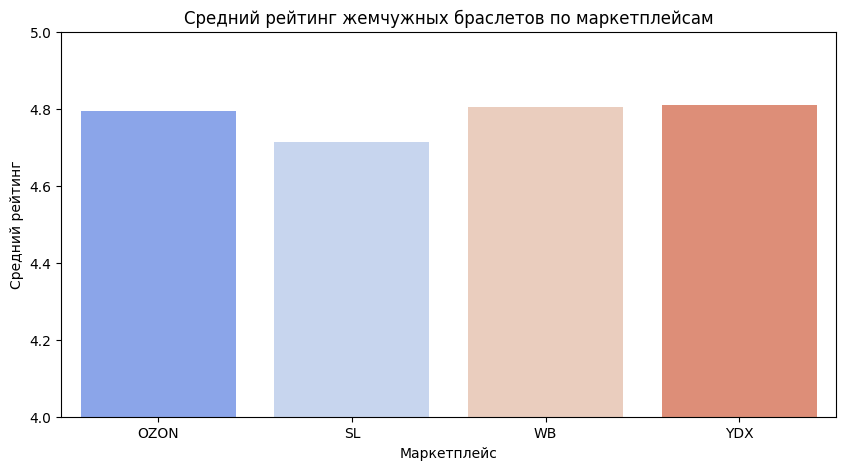

In [ ]:
# Средний рейтинг жемчужных браслетов по маркетплейсам
plt.figure(figsize=(10, 5))
df_pearl_rating = df_pearl.groupby('market')['rating'].mean().reset_index()
sns.barplot(data=df_pearl_rating, x='market', y='rating', palette="coolwarm")
plt.title("Средний рейтинг жемчужных браслетов по маркетплейсам")
plt.xlabel("Маркетплейс")
plt.ylabel("Средний рейтинг")
plt.ylim(4, 5)
plt.show()

У всех маркетплейсов относительно высокие и одинаковые оценки пользователя по жемчужным браслетам, следовательно по данному графику нельзя сделать никаких конкретных выводов

Рейтинг браслетов по основным маркетплейсам

<ipython-input-64-049f9ed7c8ad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pearl_reviews, x='market', y='reviews_count', palette="coolwarm")


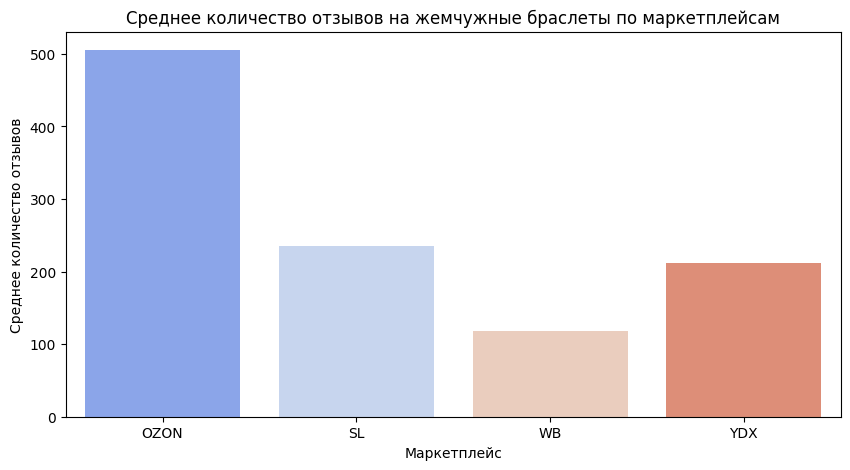

In [ ]:
# Среднее количество отзывов на жемчужные браслеты по маркетплейсам
plt.figure(figsize=(10, 5))
df_pearl_reviews = df_pearl.groupby('market')['reviews_count'].mean().reset_index()
sns.barplot(data=df_pearl_reviews, x='market', y='reviews_count', palette="coolwarm")
plt.title("Среднее количество отзывов на жемчужные браслеты по маркетплейсам")
plt.xlabel("Маркетплейс")
plt.ylabel("Среднее количество отзывов")
plt.show()

Озон опять же лидирует, уже среди количества отзывов на браслеты по маркетплейсам